In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motorcycle-dataset/BIKE DETAILS.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Data Acquring

In [3]:
df=pd.read_csv("../input/motorcycle-dataset/BIKE DETAILS.csv")

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


# Data Cleaning
**** Missing values

In [8]:
df['ex_showroom_price'].fillna(np.round(df['ex_showroom_price'].mean(),2),inplace=True)

In [9]:
np.round(df['ex_showroom_price'],2)

0        87958.71
1        87958.71
2       148114.00
3        89643.00
4        87958.71
          ...    
1056     52000.00
1057     51000.00
1058     57000.00
1059     58000.00
1060     75000.00
Name: ex_showroom_price, Length: 1061, dtype: float64

# DATA PREPROCESSING
** EDA

Text(0.5, 0, 'Count')

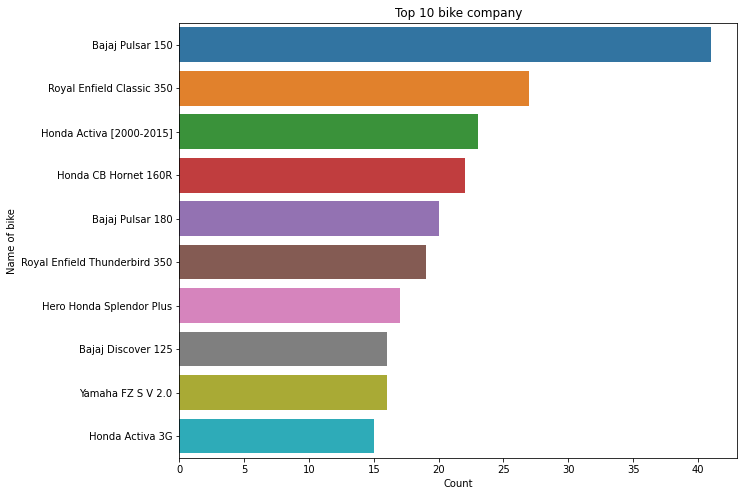

In [10]:
top_bike_company = df['name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x = top_bike_company, y = top_bike_company.index)
plt.ylabel('Name of bike')
plt.title('Top 10 bike company')
plt.xlabel('Count')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

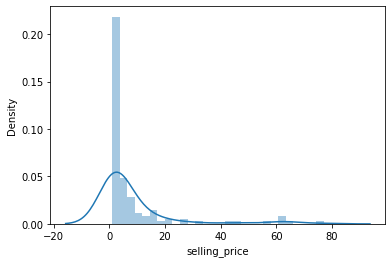

In [11]:
sns.distplot(df['selling_price'].value_counts())

<AxesSubplot:xlabel='year', ylabel='count'>

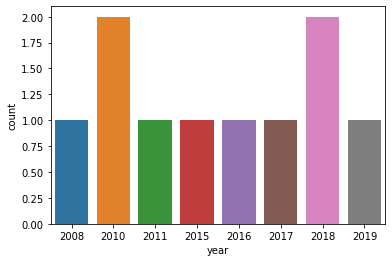

In [12]:
sns.countplot(x=df['year'].head(10))

<AxesSubplot:xlabel='seller_type', ylabel='count'>

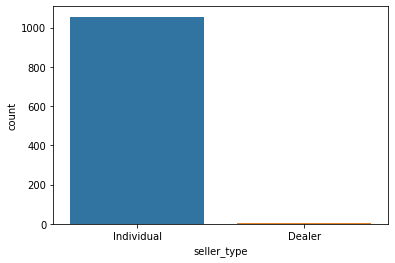

In [13]:
sns.countplot(x=df['seller_type'], data=df)

# Handling the Categorical values 

In [14]:
df=pd.get_dummies(df,columns=['owner','seller_type'],drop_first=True)
'''
or
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
enc=pd.DataFrame(encoder.fit_transform(df[['owner']]).toarray())
'''

"\nor\nfrom sklearn.preprocessing import OneHotEncoder\nencoder=OneHotEncoder(drop='first')\nenc=pd.DataFrame(encoder.fit_transform(df[['owner']]).toarray())\n"

In [15]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list


In [16]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [17]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

In [18]:
df['brand'] = df['name'].apply(lambda x:brand(x))
df.head()

,name,selling_price,year,km_driven,ex_showroom_price,owner_2nd owner,owner_3rd owner,owner_4th owner,seller_type_Individual,brand
0,Royal Enfield Classic 350,175000,2019,350,87958.71,0,0,0,1,Royal Enfield
1,Honda Dio,45000,2017,5650,87958.71,0,0,0,1,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,12000,148114.00,0,0,0,1,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,23000,89643.00,0,0,0,1,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,21000,87958.71,1,0,0,1,Yamaha


Name Column is a categorical Variable so we will drop this Column

In [19]:
df=df.drop('name',axis='columns')

In [20]:
df= pd.get_dummies(df, columns=['brand'], drop_first=True)

In [21]:
x=df.drop('selling_price',axis='columns')
y=df['selling_price']

## Train Test Split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Data Modeling

In [23]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred_test=lin_reg.predict(x_test)
y_pred_train=lin_reg.predict(x_train)

In [25]:
train_res=y_train-y_pred_train
test_res=y_test-y_pred_test

In [26]:
train_res

498     15256.655849
506      5891.593252
1019    -6077.087012
693       -29.740670
209    -13157.434523
            ...     
153     35649.572030
955      8894.515710
222     -3827.132393
629     -6574.398577
828     -9451.001226
Name: selling_price, Length: 795, dtype: float64

In [27]:
test_res

992     -1693.001527
40      60267.201872
766    -10607.610000
358    -11807.788459
143    -42823.337841
            ...     
182     -3839.822556
578     -2851.006291
452    -13269.337744
1042    -8380.178535
798      9831.694512
Name: selling_price, Length: 266, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
mse=mean_squared_error(y_test,y_pred_test)
mse

1029620900.4090092

In [30]:
mse1=mean_squared_error(y_train,y_pred_train)
mse1

508412353.3491505

In [31]:
rmse=np.sqrt(mse)
rmse

32087.706375012367

In [32]:
rmse=np.sqrt(mse1)
rmse

22548.001094313226

In [33]:
lin_reg.score(x_train,y_train)

0.8267322551269888

In [34]:
lin_reg.score(x_test,y_test)

0.7333163299423429

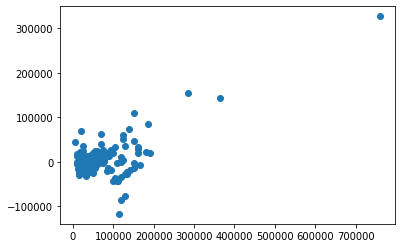

In [35]:
plt.scatter(y_test,test_res)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

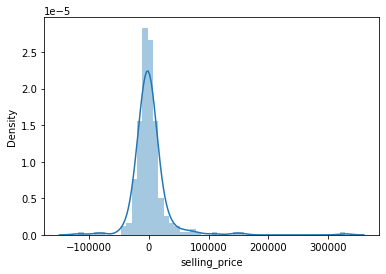

In [36]:
sns.distplot(test_res,kde=True)

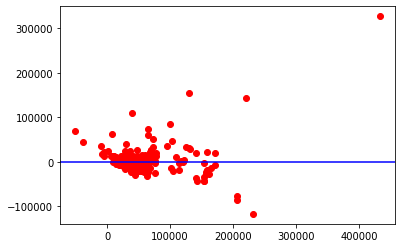

In [37]:
plt.scatter(y_pred_test,test_res,c='r')
plt.axhline(y=0,color='blue')

In [38]:
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     288.9
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        18:31:49   Log-Likelihood:                -12242.
No. Observations:                1061   AIC:                         2.452e+04
Df Residuals:                    1045   BIC:                         2.459e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.707e+06   3.97e+05    -19.416      0.000   -8.49e+06   -6.93e+06
x[0]        3831.4254    197.189     19.430      0.000    3444.494    4218.357
x[1]          -0.0327      0.016     -2.002      0.046      -0.065      -0.001
x[2]           0.6101      0.014     42.138      0.000       0.582       0.638
x[3]       -5570.6329   2454.154     -2.270      0.023   -1.04e+04    -755.003
x[4]        1.898e+04   7732.377      2.454      0.014    3805.729    3.42e+04
x[5]        3330.5043   1.54e+04      0.217      0.828   -2.68e+04    3.35e+04
x[6]       -8248.5371   1.03e+04     -0.803      0.422   -2.84e+04    1.19e+04
x[7]       -5738.4099   2268.725     -2.529      0.012   -1.02e+04   -1286.634
x[8]       -1667.3004   2364.374     -0.705      0.481   -6306.761    2972.160
x[9]        7.184e+04   5409.999     13.279      0.000    6.12e+04    8.25e+04
x[10]       1.637e+04   5161.053      3.172      0.002    6241.171    2.65e+04
x[11]       5.424e+04   2922.697     18.557      0.000    4.85e+04       6e+04
x[12]       7669.2477   4847.568      1.582      0.114   -1842.829    1.72e+04
x[13]       1287.0333   3395.199      0.379      0.705   -5375.151    7949.218
x[14]       4989.1703   2949.105      1.692      0.091    -797.671    1.08e+04
==============================================================================
Omnibus:                      723.154   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23087.387
Skew:                           2.666   Prob(JB):                         0.00
Kurtosis:                      25.222   Cond. No.                     5.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""